# Telco Churn Analysis
## Jessica Grogan, Fawad Chohan, and Rojalini Dash

Here is where we import pandas, numpy, and matplotlib.  These are python packages we will use to analyze the data.

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

This is to read in the data from the excel file

In [35]:
df = pd.read_excel("Data/Telco_customer_churn.xlsx")

In [37]:
df["Churn Reason"] = df["Churn Reason"].fillna("No churn")
df.groupby("Churn Reason")["Churn Value"].mean()

Churn Reason
Attitude of service provider                 1
Attitude of support person                   1
Competitor had better devices                1
Competitor made better offer                 1
Competitor offered higher download speeds    1
Competitor offered more data                 1
Deceased                                     1
Don't know                                   1
Extra data charges                           1
Lack of affordable download/upload speed     1
Lack of self-service on Website              1
Limited range of services                    1
Long distance charges                        1
Moved                                        1
Network reliability                          1
No churn                                     0
Poor expertise of online support             1
Poor expertise of phone support              1
Price too high                               1
Product dissatisfaction                      1
Service dissatisfaction                      1


This is a view of all the headers and data types in the Telco Customer Churn file.

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 34 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

This gives us a view of the first 3 rows to help visualize what the table looks like.

In [13]:
df.head(3)

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved


This is a count of the Churn Reason sorted greatest to least.

In [14]:
df.groupby("Churn Reason")["Churn Reason"].count().sort_values(ascending=False)


Churn Reason
Attitude of support person                   192
Competitor offered higher download speeds    189
Competitor offered more data                 162
Don't know                                   154
Competitor made better offer                 140
Attitude of service provider                 135
Competitor had better devices                130
Network reliability                          103
Product dissatisfaction                      102
Price too high                                98
Service dissatisfaction                       89
Lack of self-service on Website               88
Extra data charges                            57
Moved                                         53
Limited range of services                     44
Long distance charges                         44
Lack of affordable download/upload speed      44
Poor expertise of phone support               20
Poor expertise of online support              19
Deceased                                       6
Name: C

This is where we will classify the Churn Reasons into categories - preventable vs non-preventable and then break the preventable items out into categories of "Customer Service", "Network", "Pricing", and "Competition" 

In [15]:
df.loc["Churn Reason"].unique()

array(['Competitor made better offer', 'Moved',
       'Competitor had better devices',
       'Competitor offered higher download speeds',
       'Competitor offered more data', 'Price too high',
       'Product dissatisfaction', 'Service dissatisfaction',
       'Lack of self-service on Website', 'Network reliability',
       'Limited range of services',
       'Lack of affordable download/upload speed',
       'Long distance charges', 'Extra data charges', "Don't know",
       'Poor expertise of online support',
       'Poor expertise of phone support', 'Attitude of service provider',
       'Attitude of support person', 'Deceased', nan], dtype=object)

This is where we define the dictionary for the "buckets" we chose for Churn reason.

In [78]:
from collections import defaultdict
def def_return():
    return "Other"
churn_types = defaultdict(def_return)
old = {
    "Competitor made better offer":"Competition",
    "Competitor had better devices":"Competition",
    "Competitor offered higher download speeds":"Competition",
    "Competitor offered more data":"Competition",
    "Price too high":"Pricing",
    "Lack of affordable download/upload speed":"Pricing",
    "Long distance charges":"Pricing",
    "Extra data charges":"Pricing",
    "Service dissatisfaction":"Network",
    "Product dissatisfaction":"Network",
    "Lack of self-service on Website":"Network",
    "Network reliability":"Network",
    "Limited range of services":"Network",
    "Poor expertise of online support":"Customer care",
    "Poor expertise of phone support":"Customer care",
    "Attitude of service provider":"Customer care",
    "Attitude of support person":"Customer care",
    "Moved":"non-preventable",
    "Deceased":"non-preventable",
    "Don't know":"non-preventable"}

for k, v in old.items():
    churn_types[k] = v

In [68]:
df["Churn Type"] = df["Churn Reason"].map(churn_types, na_action="ignore")
df.groupby("Churn Type")["Churn Value"].mean()

Churn Type
Competition        1
Customer care      1
Network            1
Other              0
Pricing            1
non-preventable    1
Name: Churn Value, dtype: int64

This is a count of the Churn Type.  "Other" indicates the customer did not Churn.

In [81]:
df.groupby("Churn Type")["Churn Type"].count()

Churn Type
Competition         621
Customer care       366
Network             426
Other              5174
Pricing             243
non-preventable     213
Name: Churn Type, dtype: int64

This is a chart of the mean Churn Score compared to Tenure Months.

<AxesSubplot:xlabel='Tenure Months'>

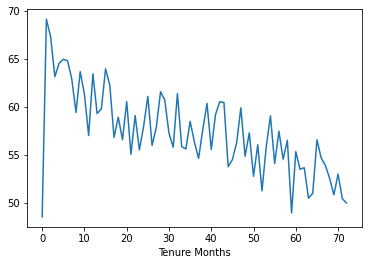

In [71]:
mean_churn_tenure = df.groupby("Tenure Months")["Churn Score"].mean()
mean_churn_tenure.plot.line("mean_churn_tenure","Tenure Months")